In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# seting a matplotlib style
plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_y_test = pd.read_csv('data/gender_submission.csv')
df_train.head()


Bad key axes.color_cycle in file https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle, line 17 ('axes.color_cycle: 1f77b4, ff7f0e, 2ca02c, d62728, 9467bd, 8c564b, e377c2, 7f7f7f, bcbd22, 17becf')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X_train = df_train[["Pclass", "Sex", 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = df_train['Survived']

X_test = df_test[["Pclass", "Sex", 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test = df_y_test['Survived']

In [ ]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train['Embarked'] = X_train["Embarked"].fillna(X_train['Embarked'].mode()[0])
X_test.fillna(X_train.mean(), inplace=True)

In [ ]:
label_encoder_sex = LabelEncoder()
X_train['Sex'] = label_encoder_sex.fit_transform(X_train['Sex'])

label_encoder_embarked = LabelEncoder()
X_train['Embarked'] = label_encoder_embarked.fit_transform(X_train['Embarked'])

X_test['Sex'] = label_encoder_sex.transform(X_test['Sex'])
X_test['Embarked'] = label_encoder_embarked.transform(X_test['Embarked'])

<ipython-input-7-f1fffa3de591>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = label_encoder_sex.fit_transform(X_train['Sex'])
<ipython-input-7-f1fffa3de591>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked'] = label_encoder_embarked.fit_transform(X_train['Embarked'])
<ipython-input-7-f1fffa3de591>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

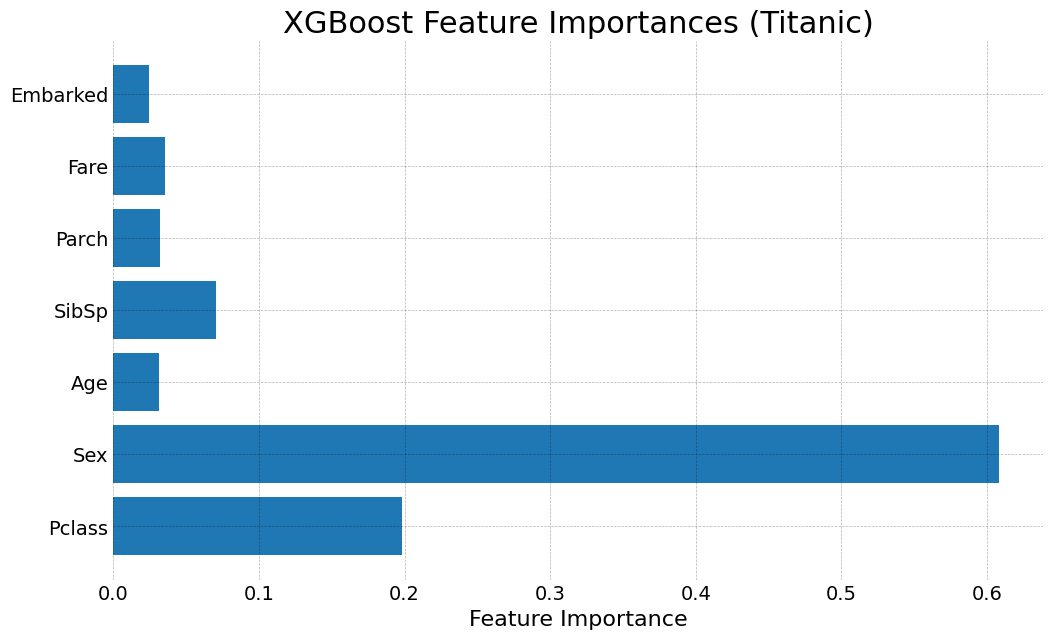

In [ ]:
feature_importancity = xgb.feature_importances_
features = X_train.columns

plt.barh(features, feature_importancity)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances (Titanic)")
plt.show()

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f" Accuracy: {round(acc, 2)}")
print(f" F1-Score: {round(f1, 2)}")

 Accuracy: 0.82
 F1-Score: 0.73


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='f1',
                    cv=5,
                    verbose=1
                    )

grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [ ]:
best_model = grid_xgb.best_estimator_
y_pred_rf = best_model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

In [ ]:
print(f" Accuracy: {round(acc, 2)}")
print(f" F1-Score: {round(f1, 2)}")

 Accuracy: 0.86
 F1-Score: 0.8


In [ ]:
#Testing Logistic Regrassion
logistic_model = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 200, 300]
}
grid_lg = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
grid_lg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='f1')

In [ ]:
best_lr_model = grid_lg.best_estimator_
y_pred_logistic = best_lr_model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

In [ ]:
print(f" Accuracy: {round(acc, 2)}")
print(f" F1-Score: {round(f1, 2)}")

 Accuracy: 0.96
 F1-Score: 0.95


In [ ]:
# Testing Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
grid_rf.fit(X_train, y_train)

In [ ]:
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

In [ ]:
print(f" Accuracy: {round(acc, 2)}")
print(f" F1-Score: {round(f1, 2)}")

 Accuracy: 0.83
 F1-Score: 0.77


**Accuracy_Score**

1.   **Logistic Regression: 0.96**
2.   **XGBoost: 0.86**
3.   **Random forest: 0.83**




In [ ]:
# The best model is Logistici Regrassion for this problem
for_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
for_submission.to_csv('submission.csv', index=False)